In [3]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 6.0 MB 57.7 MB/s 
     |████████████████████████████████| 1.7 MB 58.1 MB/s 
     |████████████████████████████████| 439 kB 77.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [27]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [58]:
df=pd.read_csv('Churn_Modelling.csv')

In [59]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
#Feature Selection

X = df.iloc[:,3:13]
y= df.iloc[:,13]

In [61]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [62]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [63]:
#Feature Engineering
geography= pd.get_dummies(X['Geography'],drop_first=True)

In [64]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [65]:
X=pd.concat([X,geography,gender],axis=1)

In [66]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [67]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [68]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [69]:
#Splitting the dataset into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [70]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train=model.fit_transform(x_train)
x_test=model.transform(x_test)


In [71]:
x_train

array([[ 2.05437653, -0.09047572, -1.04410847, ..., -0.57625055,
        -0.57251144, -1.10394768],
       [-1.27327344,  0.09818381, -0.34644149, ..., -0.57625055,
         1.74668999,  0.90584003],
       [-0.74622329,  0.00385404, -0.69527498, ..., -0.57625055,
        -0.57251144, -1.10394768],
       ...,
       [-1.97600698,  0.09818381,  0.35122549, ...,  1.73535625,
        -0.57251144, -1.10394768],
       [ 0.59723788, -0.4677948 , -1.04410847, ..., -0.57625055,
        -0.57251144, -1.10394768],
       [ 0.21486816,  0.09818381,  1.74655945, ...,  1.73535625,
        -0.57251144,  0.90584003]])

In [72]:
x_train.shape

(7000, 11)

In [73]:
#importing tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout



In [74]:
#ANN initialise
classifier = Sequential()


In [75]:
#Input Layer Adding
classifier.add(Dense(units=11,activation='relu'))


In [76]:
classifier.add(Dense(units=8,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))

In [77]:
#Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [78]:
import tensorflow as tf

early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [79]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
model_hist=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=200,callbacks=early_stoping)

Epoch 1/200
469/469 [==============================] - 4s 5ms/step - loss: 0.4920 - accuracy: 0.7701 - val_loss: 0.4549 - val_accuracy: 0.8035
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 0.4348 - accuracy: 0.8076 - val_loss: 0.4352 - val_accuracy: 0.8230
Epoch 3/200
469/469 [==============================] - 3s 7ms/step - loss: 0.4186 - accuracy: 0.8230 - val_loss: 0.4255 - val_accuracy: 0.8152
Epoch 4/200
469/469 [==============================] - 3s 7ms/step - loss: 0.4076 - accuracy: 0.8243 - val_loss: 0.4189 - val_accuracy: 0.8191
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.4001 - accuracy: 0.8262 - val_loss: 0.4098 - val_accuracy: 0.8183
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3920 - accuracy: 0.8285 - val_loss: 0.4027 - val_accuracy: 0.8239
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3846 - accuracy: 0.8322 - val_loss: 0.3943 - val_accuracy: 0.8196

In [82]:
model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<ipython-input-83-a440dacbf147>:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['train','test'],loc='upper_left')


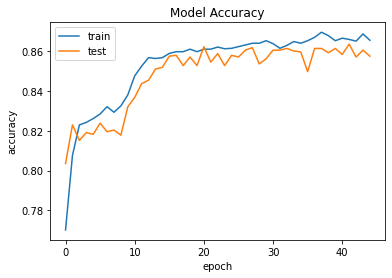

In [83]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper_left')
plt.show()